# Dolby.io Podcast Analysis
PyData Global 2021 | @BradenRiggs1

*Learn more about Dolby.io Analyze APIs:* https://docs.dolby.io/media-apis/docs

*Learn more about Speech-to-text:* https://docs.microsoft.com/en-us/azure/cognitive-services/speech-service/rest-speech-to-text

*Learn more about Natural Language Tool Kit:* https://www.nltk.org/api/nltk.html

*Learn more about pyAudio Analysis:* https://github.com/tyiannak/pyAudioAnalysis/wiki

## Imports
---

In [265]:
#Plotting and Basic Tools

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import scipy.io.wavfile as wavfile
import pandas as pd
import numpy as np
import json
import os
import re

In [145]:
#Natural Language Processing

import nltk
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

In [146]:
#PyAudio Analysis

from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures

## Part 1: Basic Data
---

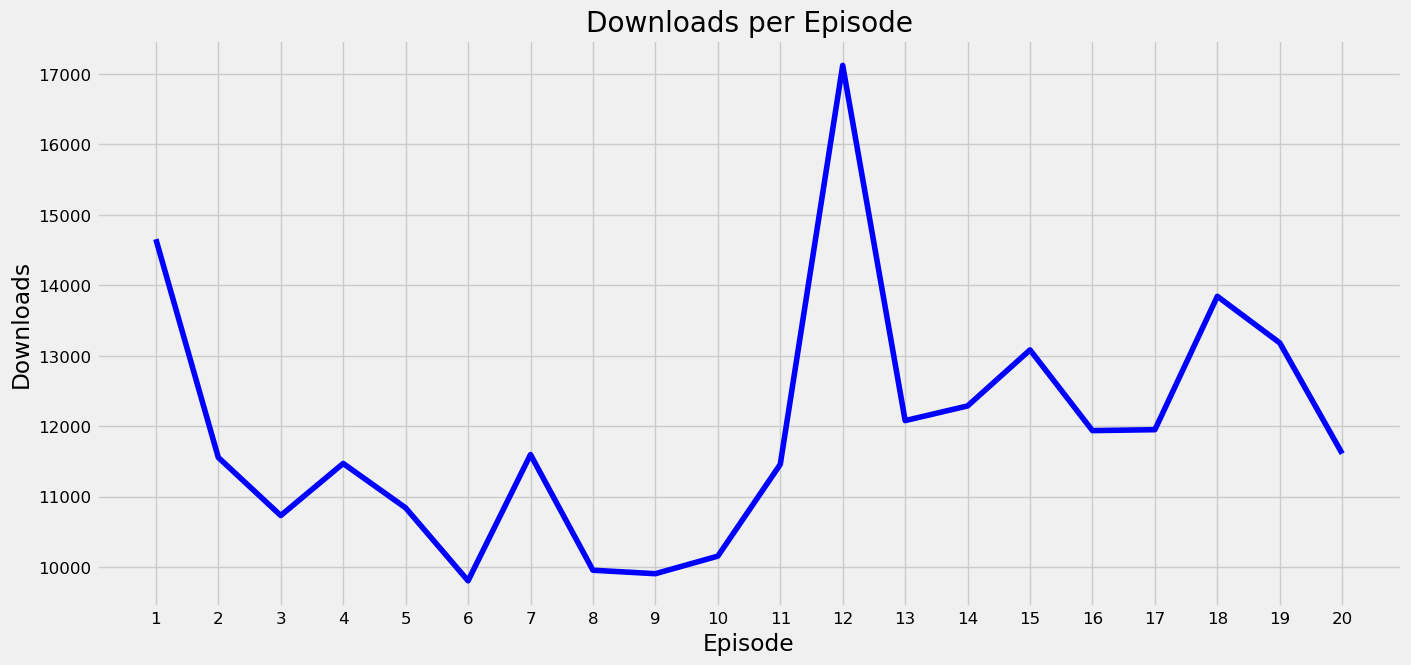

In [266]:
df = pd.read_csv("views.csv")
df.plot(x = 0, y=1, xticks = range(1,21), title = "Downloads per Episode", 
        xlabel = "Episode", ylabel = "Downloads", 
        figsize=(15,7), grid =1, legend = 0, c = "b", fontsize =12)

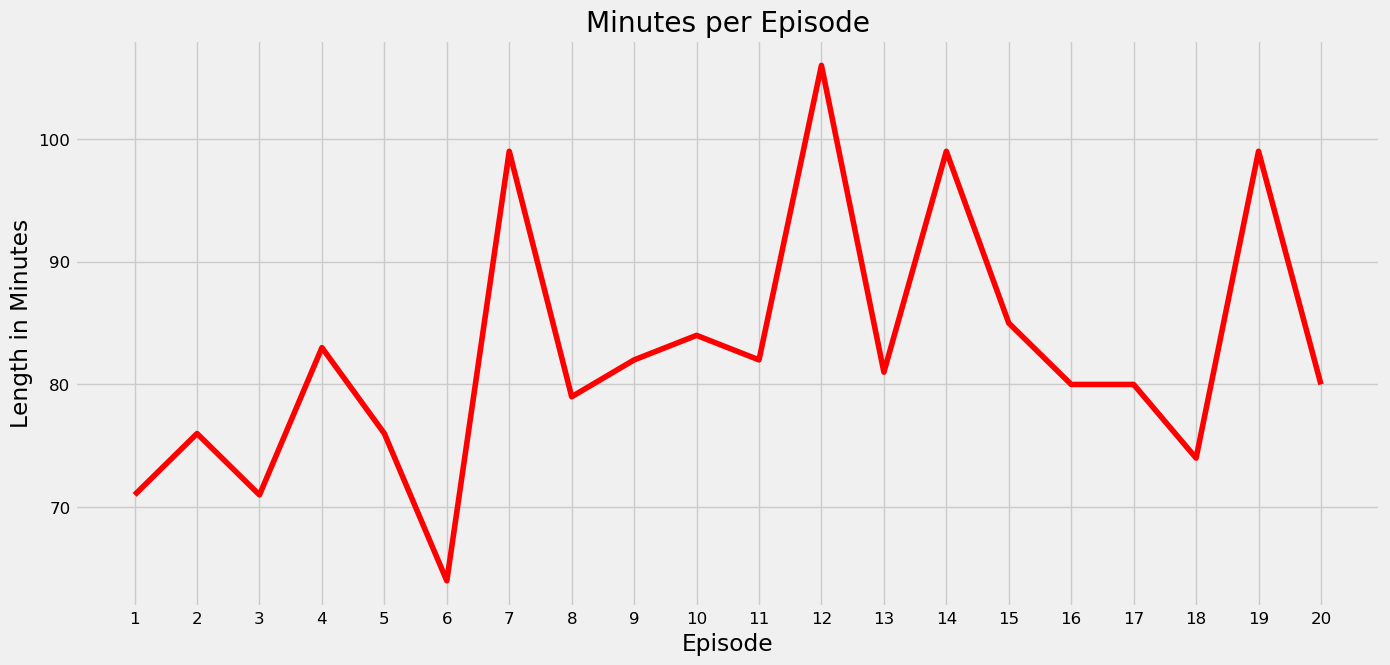

In [267]:
df.plot(x = 0, y=2, xticks = range(1,21), title = "Minutes per Episode", 
        xlabel = "Episode", ylabel = "Length in Minutes", 
        figsize=(15,7), grid =1, legend = 0, c = "r", fontsize =12)


## Part 2: Transcriptions (Transcriptions.ipynb) and Natural Language Processing
---

Learn more about Speech-to-text: https://docs.microsoft.com/en-us/azure/cognitive-services/speech-service/rest-speech-to-text

Learn more about the Natural Language Tool Kit: https://www.nltk.org/

**Transcriptions are great for:**
* Content analysis
* Sentiment analysis
* Classification tasks

In [268]:
#load in trascriptions
transcriptions = {}
for file in os.listdir("raw_transcriptions/"):
    name = int(file.split(".")[0])
    load_file = json.load(open("raw_transcriptions/" + file))
    transcriptions[name] = load_file["combinedRecognizedPhrases"][0]["lexical"]

In [269]:
#Count total words
word_counts = []
for i in np.arange(1,21): 
    word_counts.append(len(transcriptions[i]))

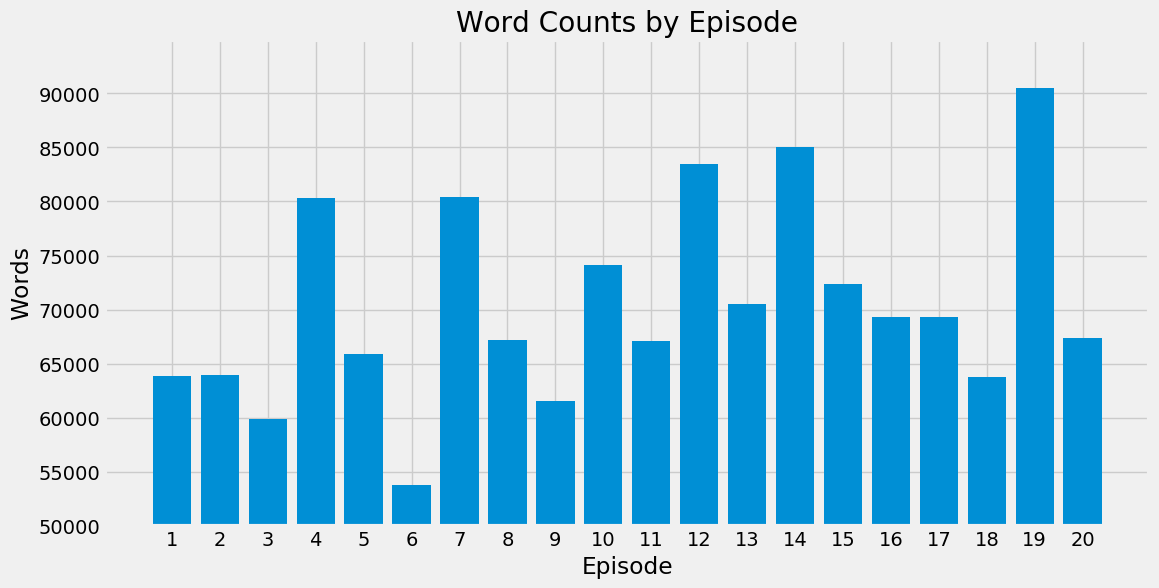

In [270]:
fig = plt.figure(figsize=(12, 6))

plt.bar(np.arange(1,21),word_counts)
plt.xticks(np.arange(1,21))
plt.title("Word Counts by Episode")
plt.xlabel("Episode")
plt.ylim(50000)
plt.ylabel("Words")
plt.show()

In [271]:
#Count unique words
unique_wc = []
for i in np.arange(1,21):
    unique_wc.append(len(set(transcriptions[i].split())))

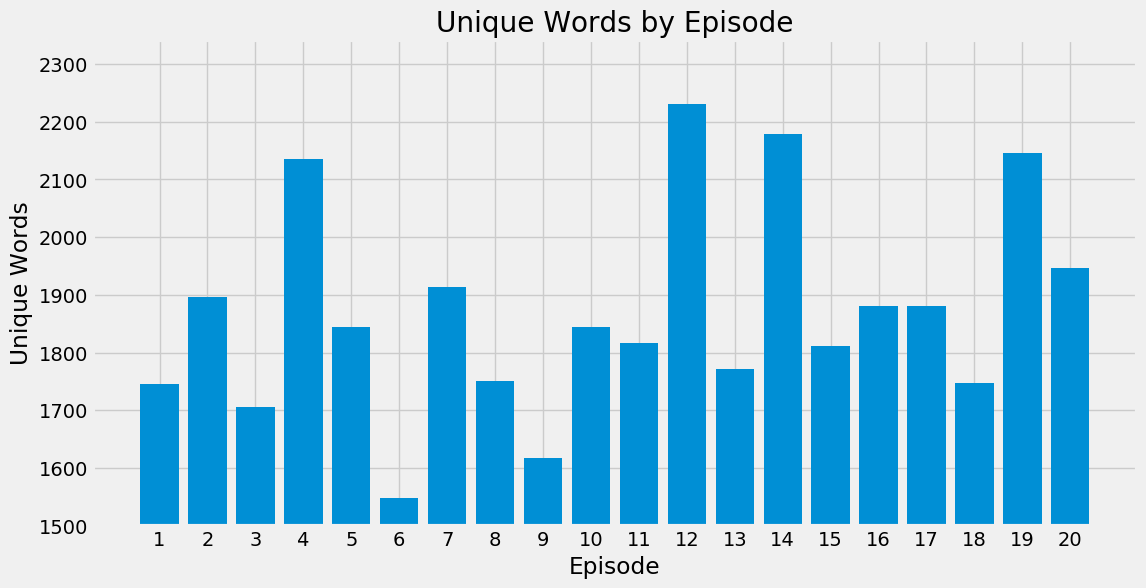

In [272]:
fig = plt.figure(figsize=(12, 6))
plt.bar(np.arange(1,21),unique_wc)
plt.xticks(np.arange(1,21))
plt.title("Unique Words by Episode")
plt.xlabel("Episode")
plt.ylabel("Unique Words")
plt.ylim(1500)
plt.show()

In [273]:
#Lets learn more about the first podcast
podcast_episode = 1

tokenized_sent = word_tokenize(transcriptions[1])
fdist = FreqDist(tokenized_sent)
mc = dict(fdist.most_common(30))

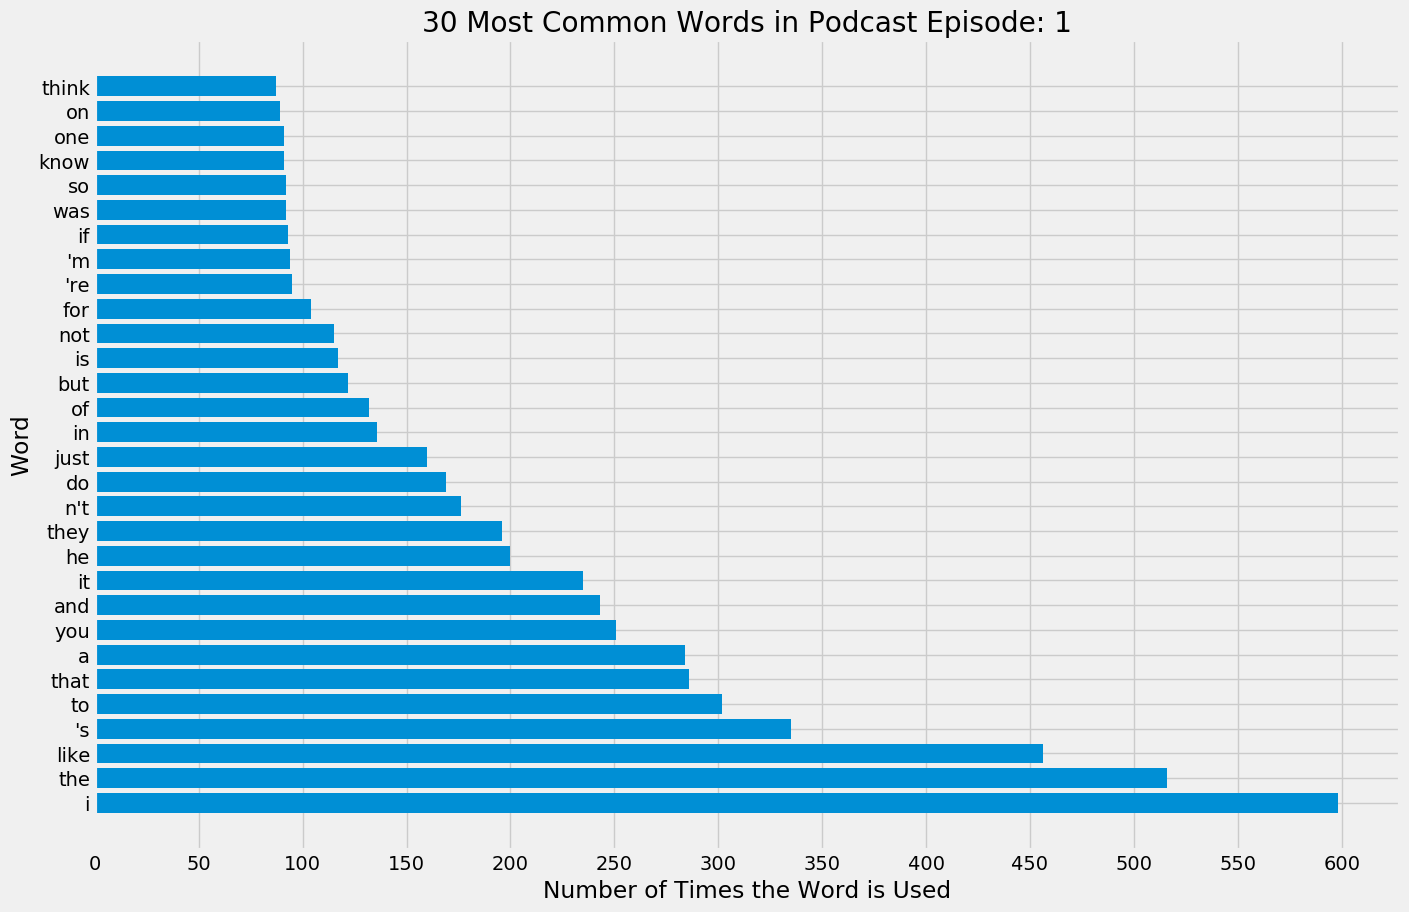

In [274]:
fig = plt.figure(figsize=(15, 10))
plt.barh(list(mc.keys()),list(mc.values()))
plt.xticks(range(0,max(mc.values())+50,50))
plt.title("30 Most Common Words in Podcast Episode: " + str(podcast_episode))
plt.ylabel("Word")
plt.xlabel("Number of Times the Word is Used")
plt.show()

In [275]:
#Lets filter out common english stopping words

filtered_sent = []
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
        
fdist = FreqDist(filtered_sent)
mc = dict(fdist.most_common(30))

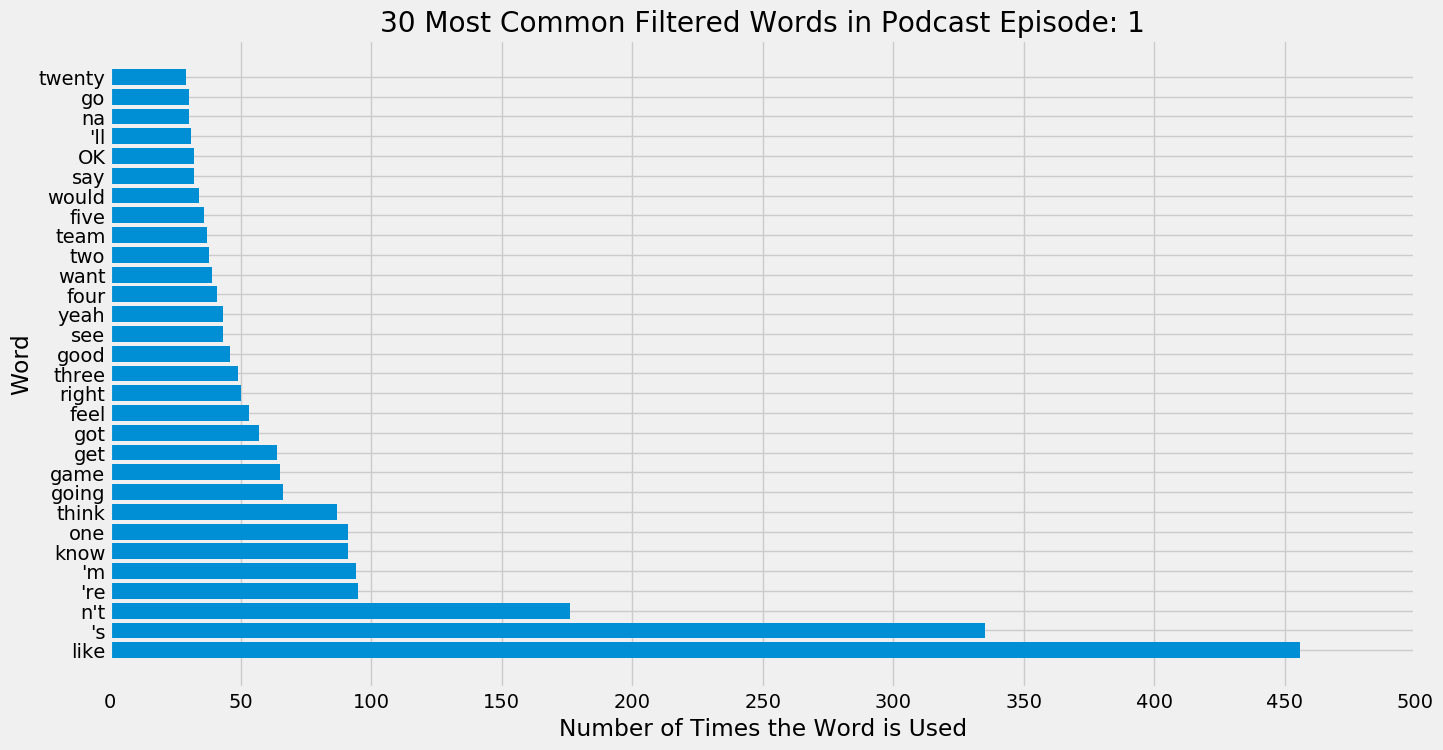

In [276]:
fig = plt.figure(figsize=(15, 8))
plt.barh(list(mc.keys()),list(mc.values()))
plt.xticks(range(0,max(mc.values())+50,50))
plt.title("30 Most Common Filtered Words in Podcast Episode: " + str(podcast_episode))
plt.ylabel("Word")
plt.xlabel("Number of Times the Word is Used")
plt.show()

In [277]:
#Valence Aware Dictionary for Sentiment Reasoning... VADER
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

sid = SentimentIntensityAnalyzer() #VADER
sid.polarity_scores(' '.join(word for word in filtered_sent)) #Whole transcript

{'neg': 0.079, 'neu': 0.642, 'pos': 0.28, 'compound': 1.0}

In [278]:
neg = [] #Negative score
neu = [] #Neutral Score
pos = [] #Positive Score

for podcast in np.arange(1,21):
    tokenized_sent = word_tokenize(transcriptions[podcast])    
    filtered_sent  = []
    
    for w in tokenized_sent:
        if w not in stop_words:
            filtered_sent.append(w)
    
    pol = sid.polarity_scores(' '.join(word for word in filtered_sent))
    neg.append(pol["neg"])
    neu.append(pol["neu"])
    pos.append(pol["pos"])

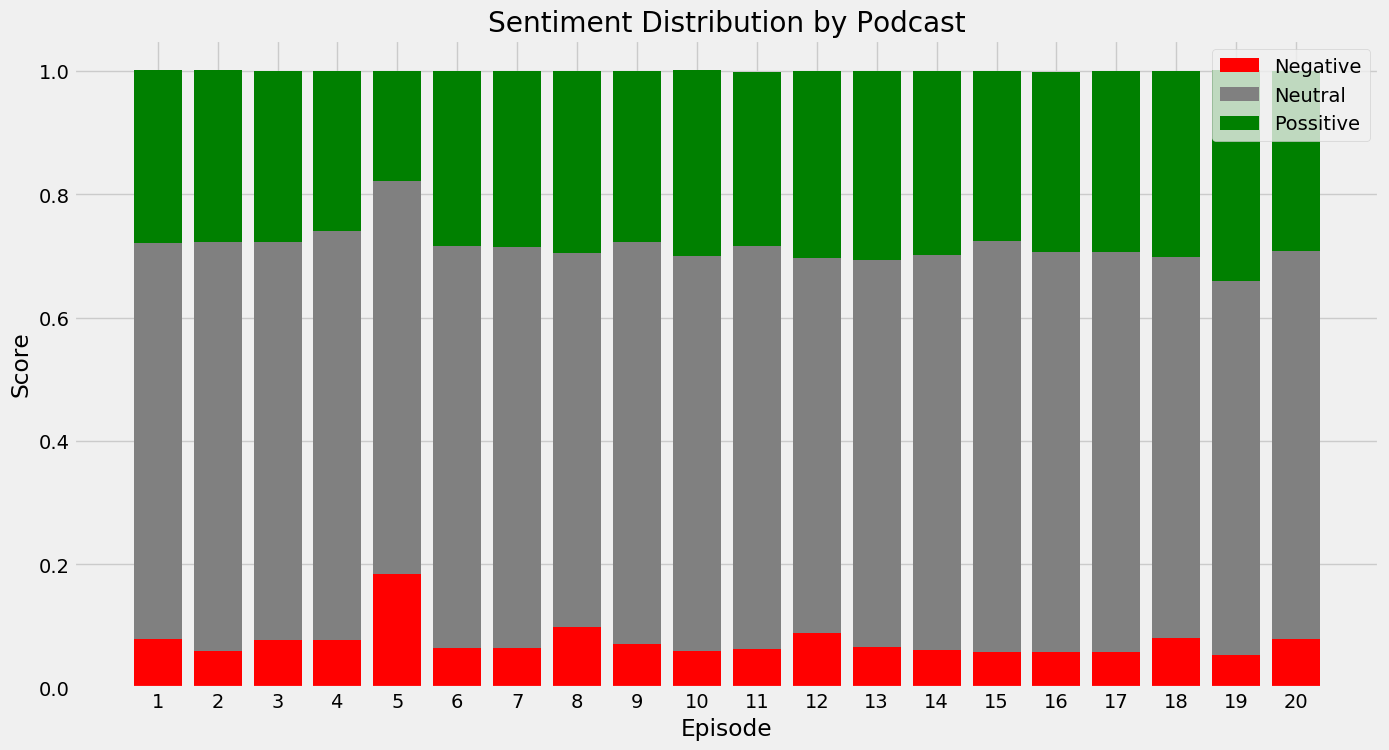

In [279]:
x = np.arange(1,21)
fig = plt.figure(figsize=(15, 8))

plt.bar(x, neg, color='r')
plt.bar(x, neu, bottom= neg, color='grey')
plt.bar(x, pos, bottom=np.add(neg, neu), color = 'g')

plt.xlabel("Episode")
plt.ylabel("Score")
plt.legend(["Negative", "Neutral", "Possitive"])
plt.title("Sentiment Distribution by Podcast")
plt.xticks(x)
plt.show()

In [280]:
print("Average Positive: " + str(np.mean(pos)))
print("Average Neutral:  " + str(np.mean(neu)))
print("Average negative: " + str(np.mean(neg)))

Average Positive: 0.28525000000000006
Average Neutral:  0.64005
Average negative: 0.0748


In [281]:
#Lets learn more about the first podcast
podcast_episode = 1

transcriptions = {}
for file in os.listdir("raw_transcriptions/"):
    name = int(file.split(".")[0])
    load_file = json.load(open("raw_transcriptions/" + file))
    transcriptions[name] = load_file["combinedRecognizedPhrases"][0]["display"]
    
podcast = re.split('[?.!]', transcriptions[podcast_episode])

In [282]:
len(podcast)

1200

In [289]:
lower_bound = 1150
upper_bound = 1200

neg = [0]
pos = [0]
neu = [0]
for sent in podcast[lower_bound:upper_bound]:
    tokenized_sent = word_tokenize(sent)

    filtered_sent=[]
    for w in tokenized_sent:
        if w not in stop_words:
            filtered_sent.append(w)

    pol = sid.polarity_scores(' '.join(word for word in filtered_sent))
    neg.append(neg[-1] + pol["neg"])
    neu.append(neu[-1] + pol["neu"])
    pos.append(pos[-1] + pol["pos"])

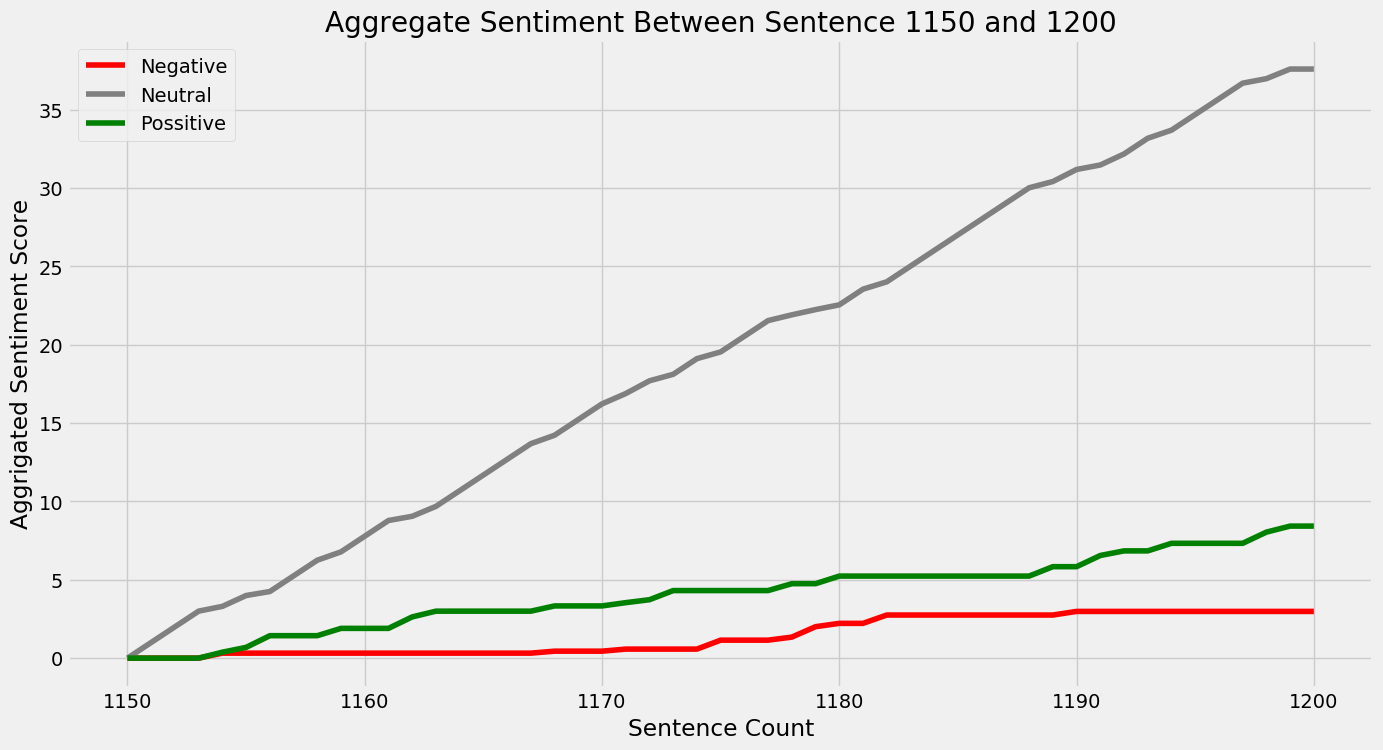

In [290]:
x = np.arange(lower_bound,upper_bound+1)
fig = plt.figure(figsize=(15, 8))

plt.plot(x, neg, color='r')
plt.plot(x, neu, color='grey')
plt.plot(x, pos, color="g")

plt.xlabel("Sentence Count")
plt.ylabel("Aggrigated Sentiment Score")
plt.legend(["Negative", "Neutral", "Possitive"])
plt.title("Aggregate Sentiment Between Sentence " + str(lower_bound) + " and " + str(upper_bound))
plt.show()

## Part 3: PyAudio Analysis
---

Learn more about pyAudio Analysis: https://github.com/tyiannak/pyAudioAnalysis/wiki

**PyAudio Analysis is great for:**
* Exploritory data analysis
* Creating extra features and datasets
* Clustering and classification tasks

In [291]:
plt.style.use('default')

In [292]:
#Lets first trim out some 20 Minute snips of audio for runtime

for audio in os.listdir("raw_audio/raw_sports/"):
    Fs, aud = wavfile.read('raw_audio/raw_sports/'+audio) 
    first = aud[:int(Fs*600),:] # trim the first 20 minutes
    wavfile.write("raw_audio/raw_audio_trims/sport --- " + audio.split(".")[0] + "_trim.wav", Fs, first.astype(np.int16))
    
for audio in os.listdir("raw_audio/raw_business/"):
    Fs, aud = wavfile.read('raw_audio/raw_business/'+audio) 
    first = aud[:int(Fs*600)] # trim the first 20 minutes
    wavfile.write("raw_audio/raw_audio_trims/business --- " + audio.split(".")[0] + "_trim.wav", Fs, first.astype(np.int16))

### Some Terminology

The **zero-crossing rate** is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive. Its value has been widely used in both speech recognition and music information retrieval, being a key feature to classify percussive sounds. [https://en.wikipedia.org/wiki/Zero-crossing_rate]


**Energy** is the sum of squares of the signal values, normalized by the respective frame length. It's measure of signal strength.[https://www.gaussianwaves.com/2013/12/power-and-energy-of-a-signal/]

In [293]:
#Sports podcasts
[Fs, x] = audioBasicIO.read_audio_file("raw_audio/raw_audio_trims/sport --- 1_trim.wav")
#Only look at one channel, windows of 0.05 sec and frames of 0.025
F, f_names = ShortTermFeatures.feature_extraction(x[:,0], Fs, 0.050*Fs, 0.025*Fs) #Splits into frames

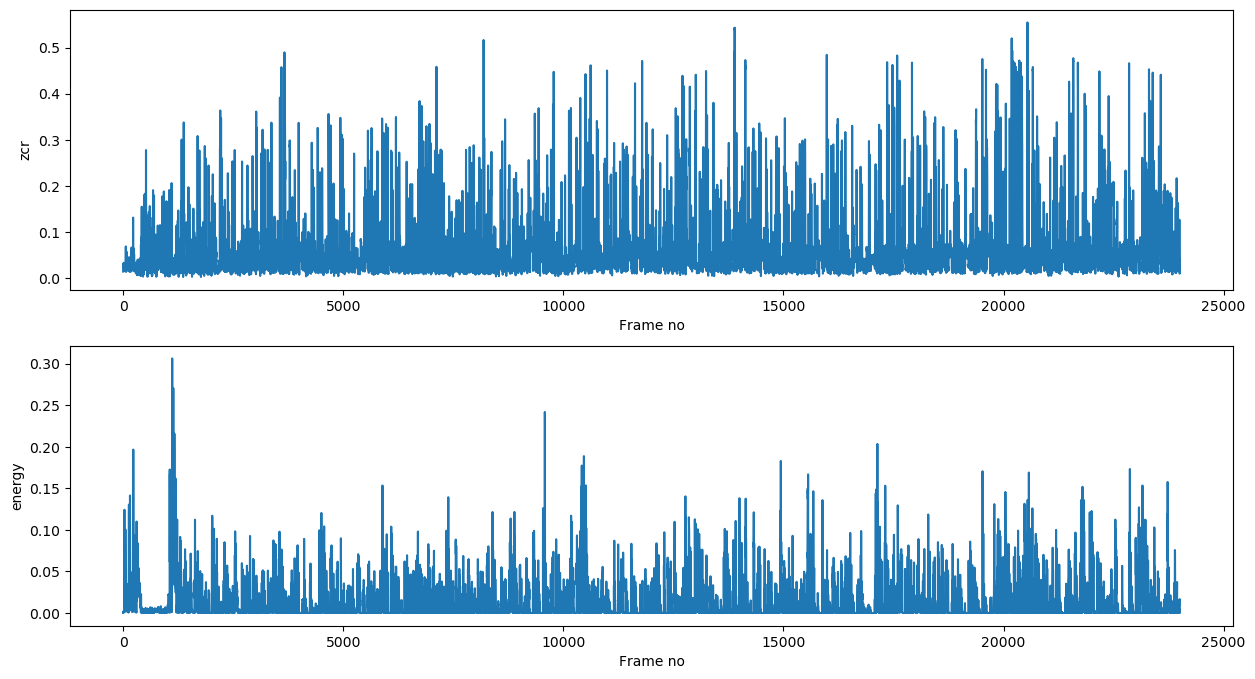

In [294]:
fig = plt.figure(figsize=(15, 8))
plt.subplot(2,1,1); plt.plot(F[0,:])
plt.xlabel('Frame no') 
plt.ylabel(f_names[0]) 
plt.subplot(2,1,2)
plt.plot(F[1,:])
plt.xlabel('Frame no')
plt.ylabel(f_names[1])
plt.show()

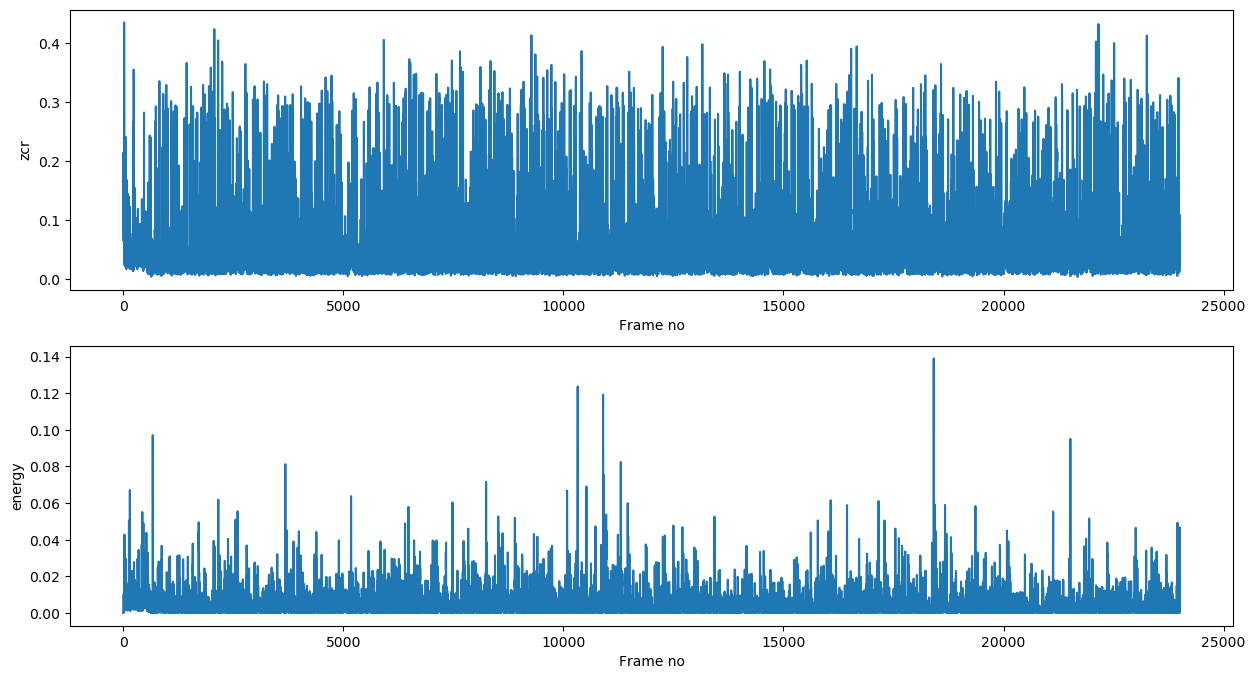

In [295]:
#Lets instead look at business podcasts
[Fs, x] = audioBasicIO.read_audio_file("raw_audio/raw_audio_trims/business --- 21_trim.wav")
F, f_names = ShortTermFeatures.feature_extraction(x[:], Fs, 0.050*Fs, 0.025*Fs)

fig = plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
plt.plot(F[0,:]) 
plt.xlabel('Frame no')
plt.ylabel(f_names[0]) 
plt.subplot(2,1,2)
plt.plot(F[1,:]) 
plt.xlabel('Frame no')
plt.ylabel(f_names[1])
plt.show()

## Chromagram

The chromagram is a transformation of a signal's time-frequency properties into a temporally varying precursor of pitch. This transformation is based on perceptual observations concerning the auditory system and has been shown to possess several interesting mathematical properties.

In [299]:
lower_bound = 0
upper_bound = 3

TypeError: 'Figure' object is not callable

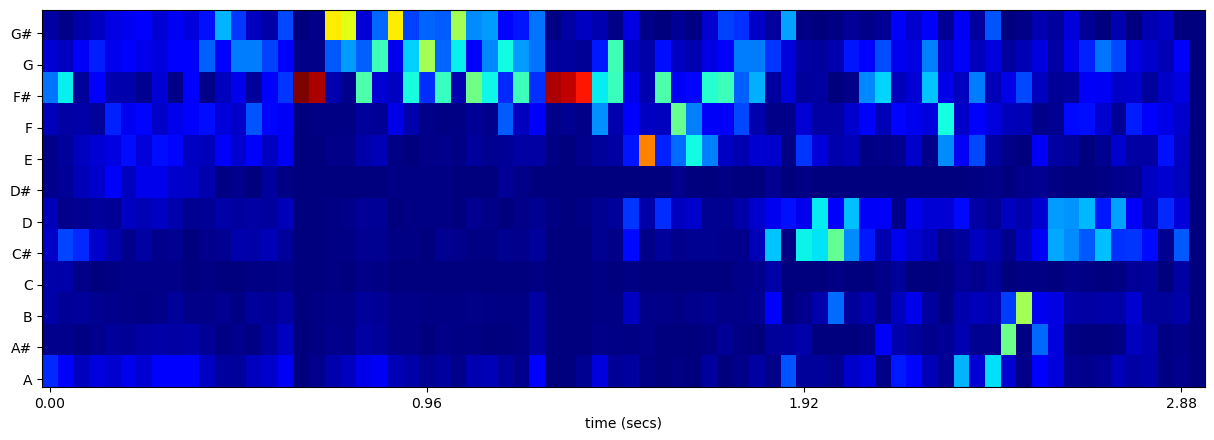

In [300]:
[fs, x] = audioBasicIO.read_audio_file("raw_audio/raw_audio_trims/sport --- 1_trim.wav")
x = audioBasicIO.stereo_to_mono(x)
specgram, TimeAxis, FreqAxis = ShortTermFeatures.chromagram(x[lower_bound*fs:upper_bound*fs], fs, round(fs * 0.040),round(fs * 0.040), True)

TypeError: 'Figure' object is not callable

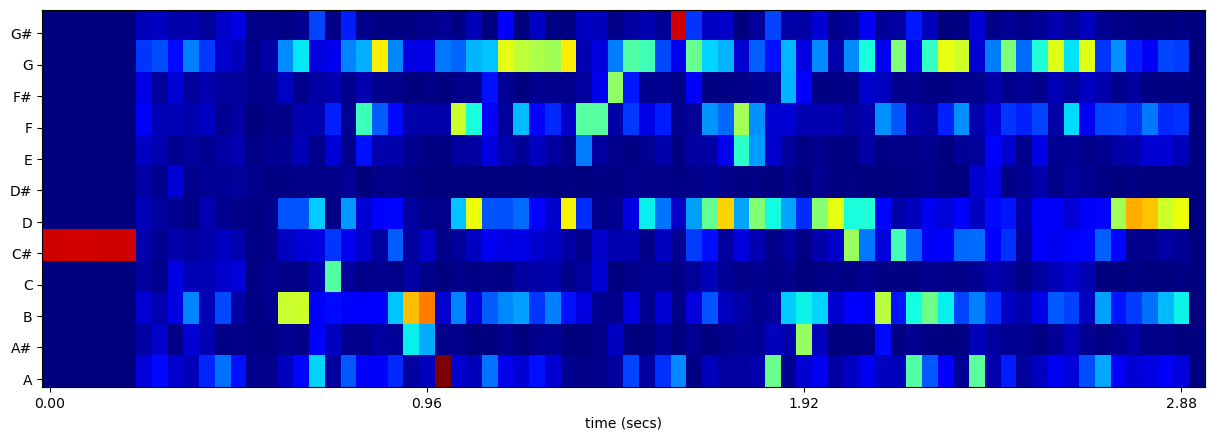

In [301]:
[fs, x] = audioBasicIO.read_audio_file("raw_audio/raw_audio_trims/business --- 21_trim.wav")
x = audioBasicIO.stereo_to_mono(x)
specgram, TimeAxis, FreqAxis = ShortTermFeatures.chromagram(x[lower_bound*fs:upper_bound*fs], fs, round(fs * 0.040),round(fs * 0.040), True)

In [ ]:
#Create feature CSVs
!python C:\Users\brigg\Anaconda3\Lib\site-packages\pyAudioAnalysis\AudioAnalysis.py featureExtractionDir -i raw_audio/raw_audio_trims/ -mw 10.0 -ms 10.0 -sw 0.50 -ss 0.50

**For each channel the previous function creates values for the following:**
https://github.com/tyiannak/pyAudioAnalysis/wiki/3.-Feature-Extraction

(a) one bases the compuation of the similarity matrix on the initial feature space. 

(b) one that is based on the reduced space (PCA) and 

(c) a chordial diagram of the groups' connections. 


The three visualizations are respectivelly stored in three directories named visualizationInitial_Chordial, visualization_Chordial, and visualizationGroup_Chordial. LDA is optional however we wont cover it here.

In [ ]:
!python C:\Users\brigg\Anaconda3\Lib\site-packages\pyAudioAnalysis\AudioAnalysis.py featureVisualization -i raw_audio/raw_audio_trims/

Lets check this out in VS Code

In [302]:
plt.style.use('fivethirtyeight')

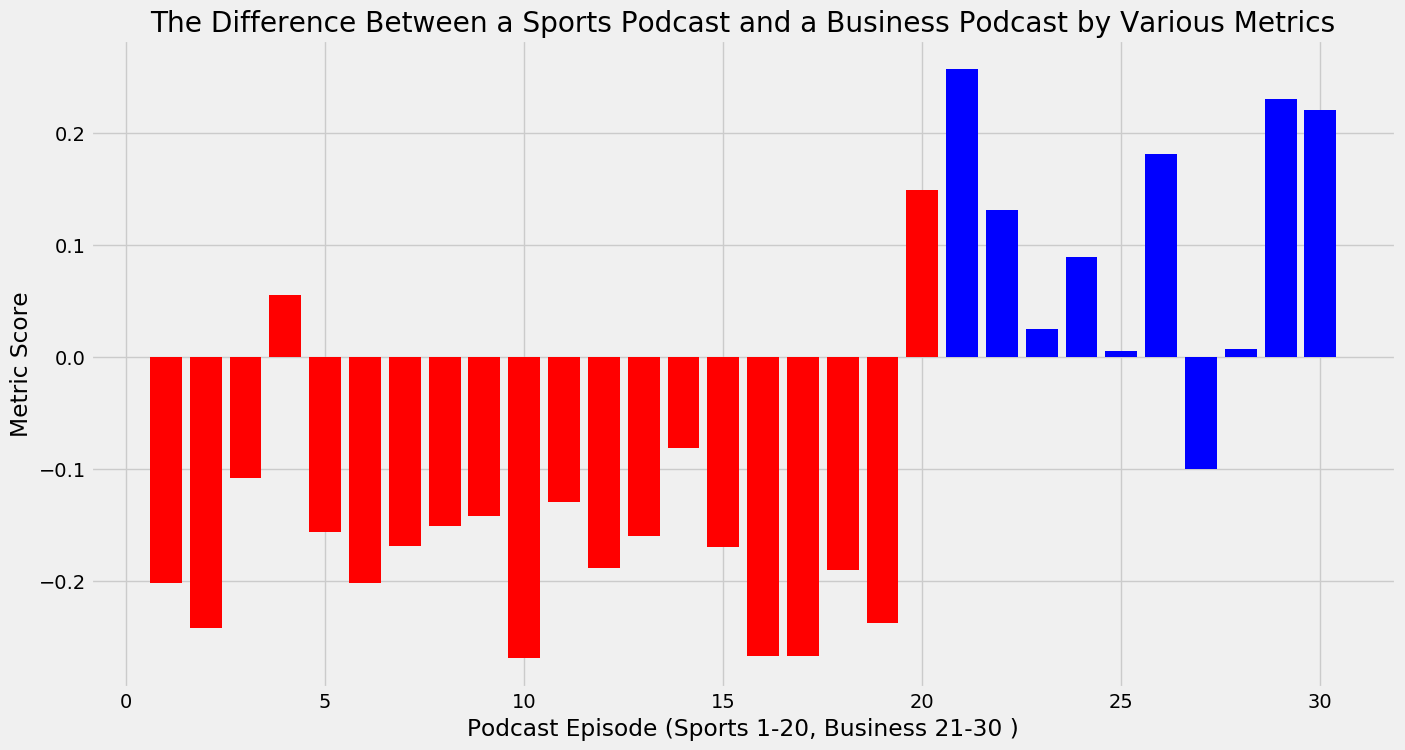

In [306]:
Sports = []
Business = []
metric = 14

for i in np.arange(1,21):
    Sports.append(np.mean(pd.read_csv("raw_audio/raw_audio_trims/sport --- "+str(i)+"_trim.wav_st.csv",header = None)[metric]))
for i in np.arange(21,31):
    Business.append(np.mean(pd.read_csv("raw_audio/raw_audio_trims/business --- "+str(i)+"_trim.wav_st.csv",header = None)[metric]))
    
fig = plt.figure(figsize=(15, 8))
plt.bar(np.arange(1,21), Sports, color='r')
plt.bar(np.arange(21,31), Business, color='b')

plt.xlabel("Podcast Episode (Sports 1-20, Business 21-30 )")
plt.ylabel("Metric Score")
plt.title("The Difference Between a Sports Podcast and a Business Podcast by Various Metrics")
plt.show()

## Part 4: Dolby.io
---

Learn more about Dolby.io Analyze: https://docs.dolby.io/media-apis/docs/analyze-api-guide

Learn more about Dolby.io Analyze Speech: https://docs.dolby.io/media-apis/docs/speech-analytics-api-guide

**Analyze is great for:**
* Content structure and composition
* Speaker diarization
* Helps with better content creation

In [308]:
df_analyze = pd.DataFrame() 

for file in os.listdir("raw_data_audio/"):
    with open("raw_data_audio/" + file,'r') as f:
        data = json.loads(f.read())
    df_analyze = df_analyze.append(pd.json_normalize(data, max_level=7))
    f.close()  

df_analyze["file_names"] = os.listdir("raw_data_audio/")

In [309]:
df_analyze.head()

,media_info.container.kind,media_info.container.duration,media_info.container.bitrate,media_info.container.size,media_info.audio.codec,media_info.audio.channels,media_info.audio.sample_rate,media_info.audio.duration,media_info.audio.bitrate,processed_region.start,...,processed_region.audio.noise.snr_average,processed_region.audio.noise.level_average,processed_region.audio.music.percentage,processed_region.audio.music.num_sections,processed_region.audio.speech.percentage,processed_region.audio.speech.num_sections,processed_region.audio.silence.percentage,processed_region.audio.silence.num_sections,processed_region.audio.silence.sections,file_names
0,none,4278.654,128000,68458473,mp3,2,44100,4278.648,128000,0.0,...,75.60,-97.76,2.64,2,96.2,14,3.03,11,"[{'section_id': 'si_1', 'start': 424.68, 'dura...",1.json
0,none,5045.621,128000,80729949,mp3,2,44100,5045.629,128000,0.0,...,71.54,-95.93,2.22,2,97.5,40,1.27,29,"[{'section_id': 'si_1', 'start': 250.78, 'dura...",10.json
0,none,4966.235,128000,79459767,mp3,2,44100,4966.243,128000,0.0,...,73.18,-98.12,2.30,2,94.4,45,3.72,32,"[{'section_id': 'si_1', 'start': 222.15, 'dura...",11.json
0,none,6363.211,128000,101811384,mp3,2,44100,6363.219,128000,0.0,...,74.81,-97.16,1.83,2,94.8,77,3.56,41,"[{'section_id': 'si_1', 'start': 97.29, 'durat...",12.json
0,none,4876.658,128000,78026538,mp3,2,44100,4876.669,128000,0.0,...,73.43,-95.37,1.09,1,96.6,65,2.16,45,"[{'section_id': 'si_1', 'start': 186.42, 'dura...",13.json


In [310]:
#Split into composition stats
composition = df_analyze[['processed_region.audio.speech.percentage','processed_region.audio.silence.percentage','processed_region.audio.music.percentage', 'file_names']]
composition['file_names'] = composition['file_names'].apply(lambda x: int(x.split(".")[0]))
composition = composition.sort_values("file_names")

<ipython-input-310-74d4dae48bb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  composition['file_names'] = composition['file_names'].apply(lambda x: int(x.split(".")[0]))


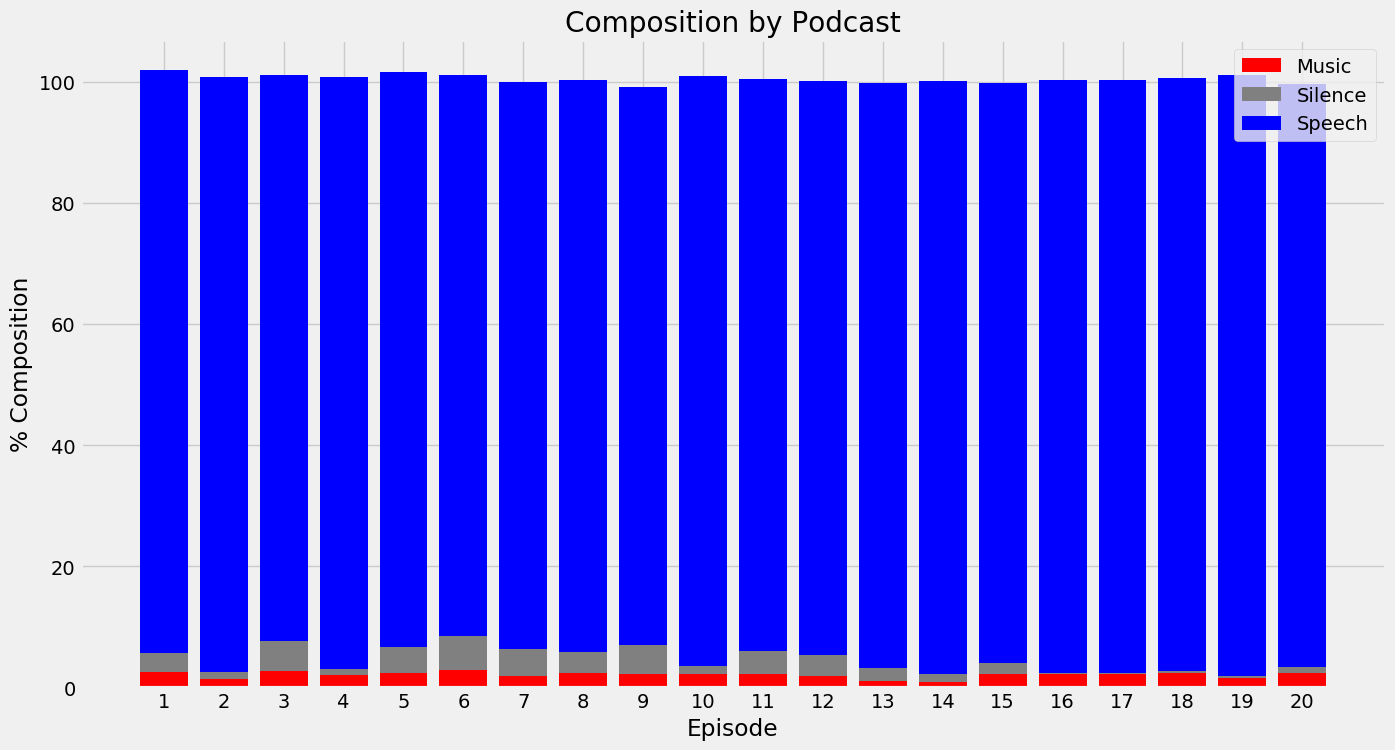

In [311]:
#Podcast breakdown
#exceeds 100% because music and speech can happen at the same time.

fig = plt.figure(figsize=(15, 8))

plt.bar(composition["file_names"], composition['processed_region.audio.music.percentage'], color='r')
plt.bar(composition["file_names"], composition['processed_region.audio.silence.percentage'], bottom=composition['processed_region.audio.music.percentage'], color='grey')
plt.bar(composition["file_names"], composition['processed_region.audio.speech.percentage'], bottom=np.add(composition['processed_region.audio.music.percentage'],composition['processed_region.audio.silence.percentage']), color='b')

plt.xlabel("Episode")
plt.ylabel("% Composition")
plt.legend(["Music", "Silence", "Speech"])
plt.title("Composition by Podcast")
plt.xticks(np.arange(1,21))
plt.show()

In [312]:
df_speech = pd.DataFrame() 

for file in os.listdir("raw_data_speech/"):
    with open("raw_data_speech/" + file,'r') as f:
        data = json.loads(f.read())
    df_speech = df_speech.append(pd.json_normalize(data,max_level=7))
    f.close()  

df_speech["file_names"] = os.listdir("raw_data_audio/")

In [215]:
df_speech.head()

,media_info.container.kind,media_info.container.duration,media_info.container.bitrate,media_info.container.size,media_info.audio.codec,media_info.audio.channels,media_info.audio.sample_rate,media_info.audio.duration,media_info.audio.bitrate,processed_region.start,processed_region.end,processed_region.audio.speech.num_talkers,processed_region.audio.speech.percentage,processed_region.audio.speech.details,file_names
0,none,4278.654,128000,68458473,mp3,2,44100,4278.648,128000,0.0,4278.65,6,96.2,"[{'talker_id': 1, 'talk_listen_ratio': 0.26, '...",1.json
0,none,5045.621,128000,80729949,mp3,2,44100,5045.629,128000,0.0,5045.63,20,97.5,"[{'talker_id': 1, 'talk_listen_ratio': 0.01, '...",10.json
0,none,4966.235,128000,79459767,mp3,2,44100,4966.243,128000,0.0,4966.24,7,94.4,"[{'talker_id': 1, 'talk_listen_ratio': 0.27, '...",11.json
0,none,6363.211,128000,101811384,mp3,2,44100,6363.219,128000,0.0,6363.22,11,94.8,"[{'talker_id': 1, 'talk_listen_ratio': 0.07, '...",12.json
0,none,4876.658,128000,78026538,mp3,2,44100,4876.669,128000,0.0,4876.67,8,96.6,"[{'talker_id': 1, 'talk_listen_ratio': 0.04, '...",13.json


In [313]:
df_speech.columns

Index(['media_info.container.kind', 'media_info.container.duration',
       'media_info.container.bitrate', 'media_info.container.size',
       'media_info.audio.codec', 'media_info.audio.channels',
       'media_info.audio.sample_rate', 'media_info.audio.duration',
       'media_info.audio.bitrate', 'processed_region.start',
       'processed_region.end', 'processed_region.audio.speech.num_talkers',
       'processed_region.audio.speech.percentage',
       'processed_region.audio.speech.details', 'file_names'],
      dtype='object')

In [314]:
df_speech.shape

(20, 15)

In [316]:
# We can convert these timestamped segments to speaker vectors for visualization

empty = np.zeros((max(df_speech["processed_region.audio.speech.num_talkers"]),int(max(df_speech["media_info.container.duration"]))))
df_speech = df_speech.sample(frac=1) #Shuffle 

monologues = []

for index, row in df_speech.iterrows():
    prasd = row["processed_region.audio.speech.details"]
    monologue_indiv = []
    for talker in prasd:
        for sect in talker["sections"]:
            if sect["duration"] == talker["longest_monologue"]:
                monologue_indiv.append([talker["longest_monologue"],sect["start"],sect["duration"]])
                
            c = 0
            while c < sect["duration"]:
                empty[talker["talker_id"]-1][int(sect["start"]) + c] = empty[talker["talker_id"]-1][int(sect["start"]) + c] + 1
                c = c + 1
                
    monologues.append(monologue_indiv)

In [317]:
empty

array([[0., 3., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [318]:
#Longest podcast of the bunch
max(df_speech["media_info.container.duration"])

6363.211

In [319]:
empty[0]

array([0., 3., 3., ..., 0., 0., 0.])

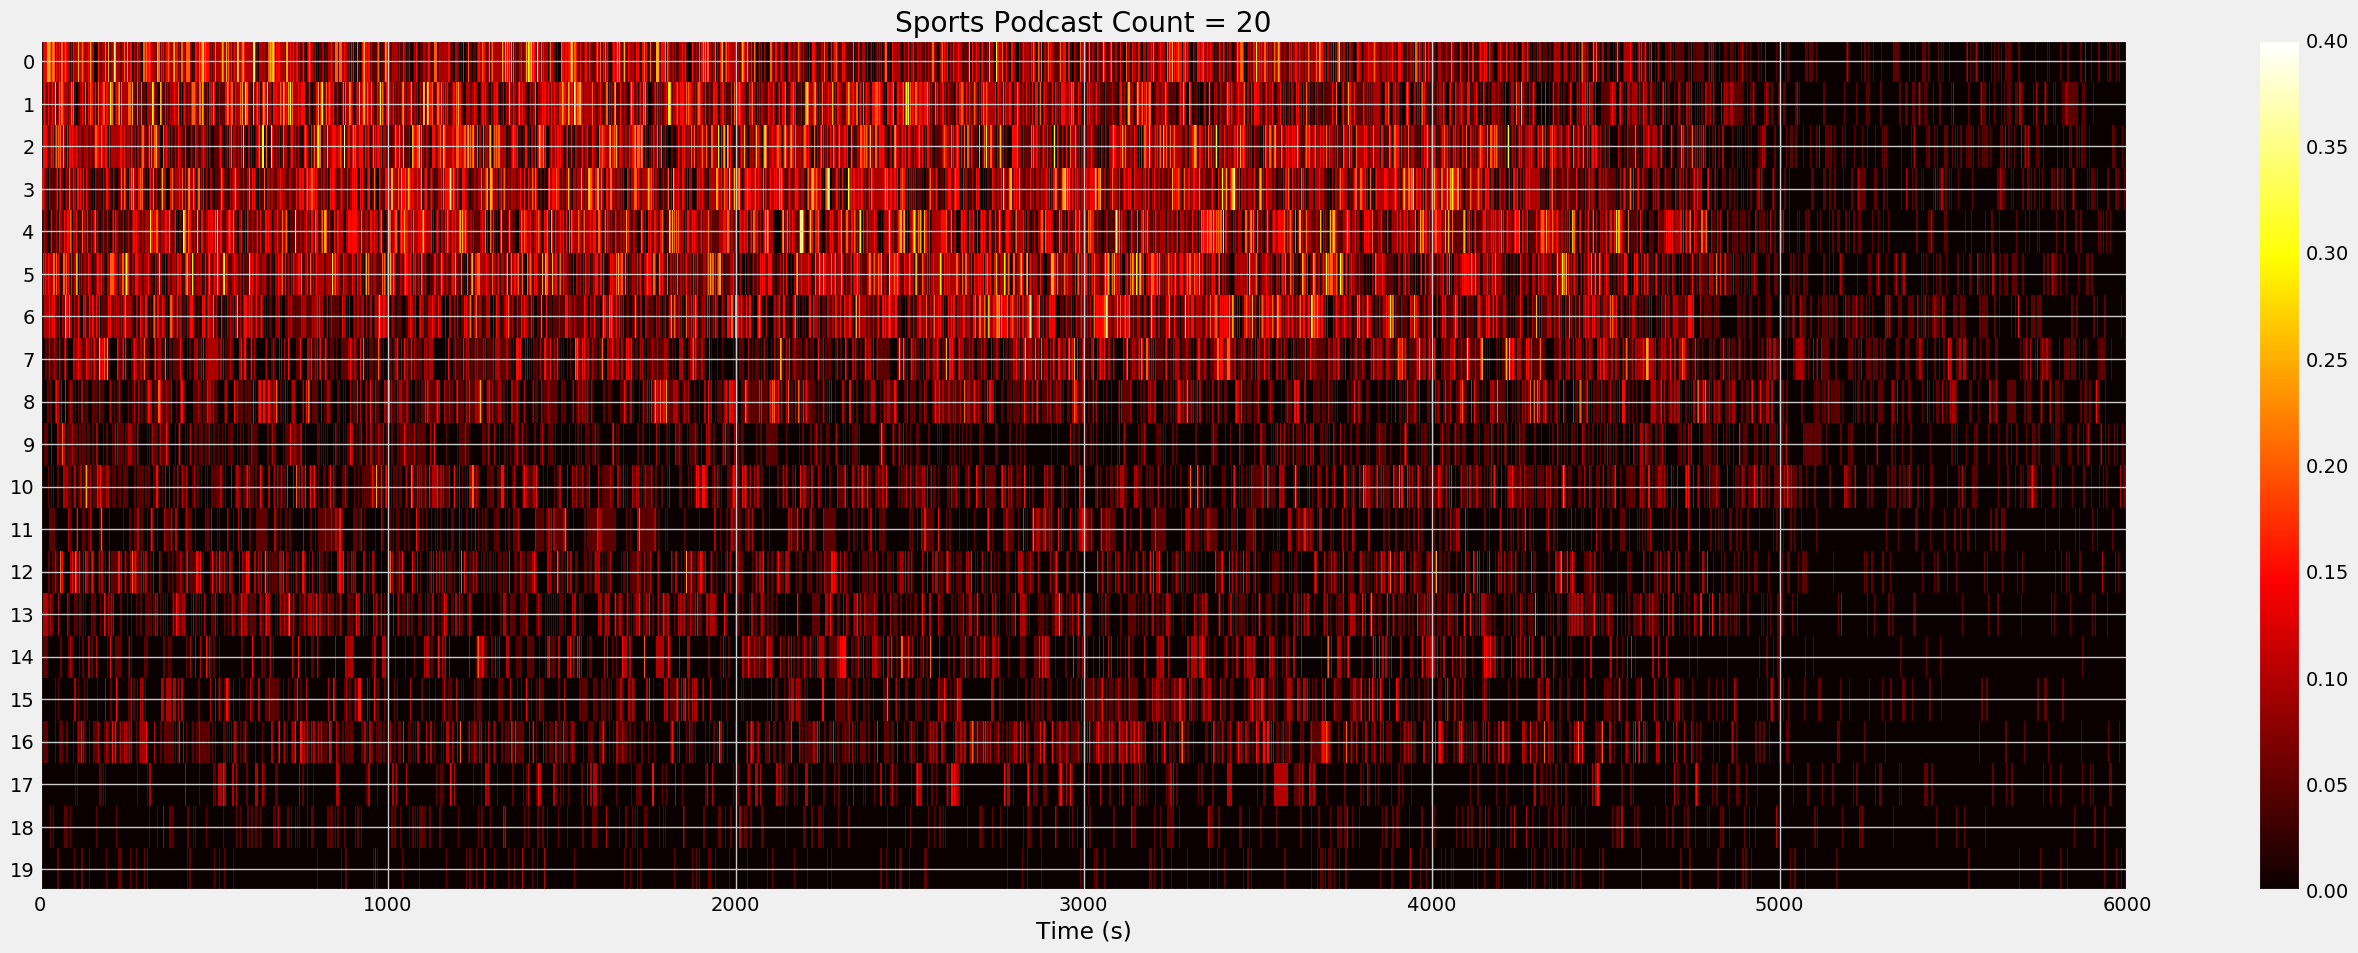

In [325]:
speaker_scope = 20
duration = 6000

lest = np.arange(0, speaker_scope)

fig, gnt = plt.subplots()
fig.set_size_inches(30, 10.5)

plt.imshow(empty[:speaker_scope]/20, cmap='hot', interpolation='nearest', aspect = "auto")
gnt.set_xlim(0,duration)
plt.yticks(lest,lest)
plt.title("Sports Podcast Count = 20")
plt.xlabel("Time (s)")
plt.colorbar()
#plt.savefig("Spoken Podcasts")
plt.show()

**Back to the slides breifly...**

## Part 5: Bringing it All Together
---

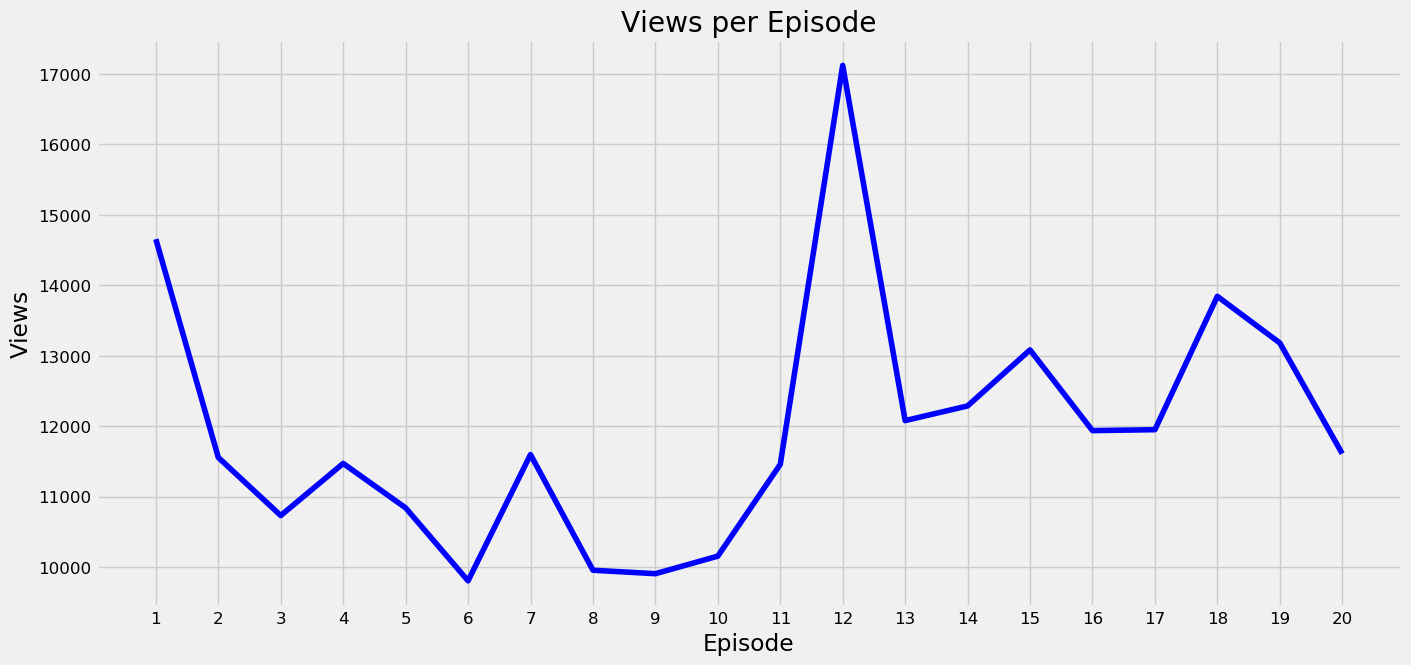

In [326]:
#Lets recap
df = pd.read_csv("views.csv")
df.plot(x = 0, y=1, xticks = range(1,21), title = "Views per Episode", 
        xlabel = "Episode", ylabel = "Views", 
        figsize=(15,7), grid =1, legend = 0, c = "b", fontsize =12)

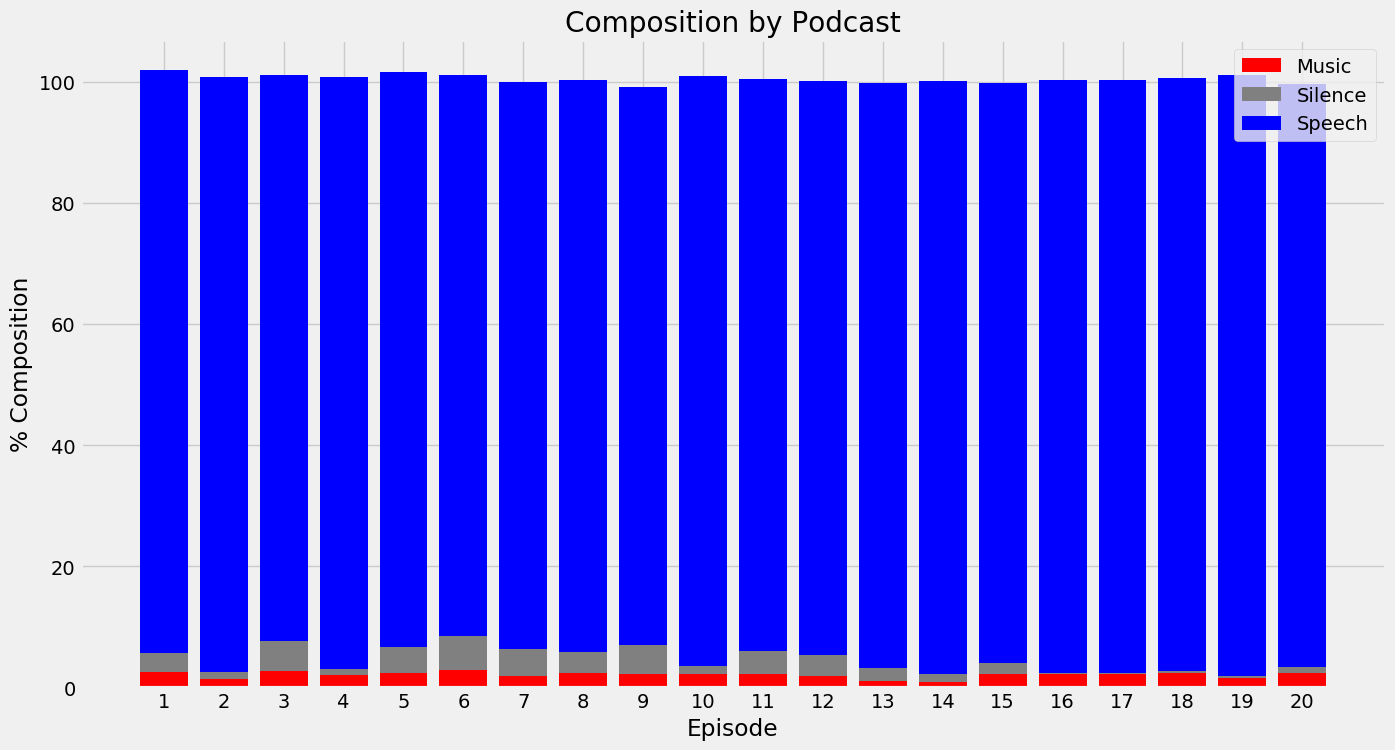

In [327]:
fig = plt.figure(figsize=(15, 8))

plt.bar(composition["file_names"], composition['processed_region.audio.music.percentage'], color='r')
plt.bar(composition["file_names"], composition['processed_region.audio.silence.percentage'], bottom=composition['processed_region.audio.music.percentage'], color='grey')
plt.bar(composition["file_names"], composition['processed_region.audio.speech.percentage'], bottom=np.add(composition['processed_region.audio.music.percentage'],composition['processed_region.audio.silence.percentage']), color='b')

plt.xlabel("Episode")
plt.ylabel("% Composition")
plt.legend(["Music", "Silence", "Speech"])
plt.title("Composition by Podcast")
plt.xticks(np.arange(1,21))
plt.show()

C:\Users\brigg\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\brigg\AppData\Roaming\Python\Python38\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


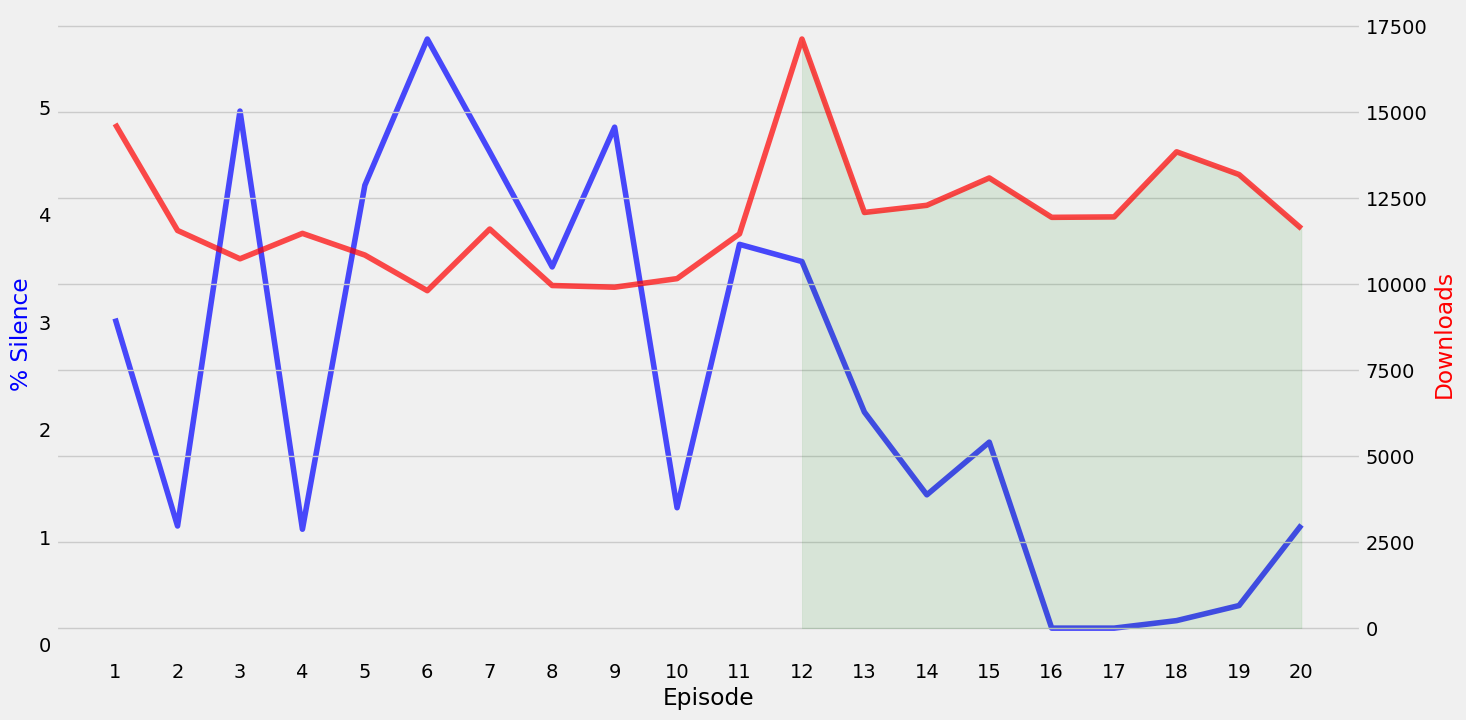

In [328]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.set_xlabel('Episode')
ax1.set_ylabel('% Silence', color='b')
ax1.plot(np.arange(1,21), composition['processed_region.audio.silence.percentage'], color="b", alpha = 0.7)
ax1.grid(None)


ax2 = ax1.twinx()  
ax2.set_ylabel('Downloads', color='r')  
ax2.plot(np.arange(1,21), df["downloads"], color="r",alpha = 0.7)

plt.fill_between(np.arange(12,21), df["downloads"][11:], alpha = 0.1, color ="g" )
plt.xticks(np.arange(1,21))
plt.show()

In [329]:
#load in trascriptions
transcriptions = {}
for file in os.listdir("raw_transcriptions/"):
    name = int(file.split(".")[0])
    load_file = json.load(open("raw_transcriptions/" + file))
    transcriptions[name] = load_file["combinedRecognizedPhrases"][0]["lexical"]

In [330]:
podcast_episode = 12
tokenized_sent = word_tokenize(transcriptions[podcast_episode])

In [332]:
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
        
fdist = FreqDist(filtered_sent)
mc = dict(fdist.most_common(30))

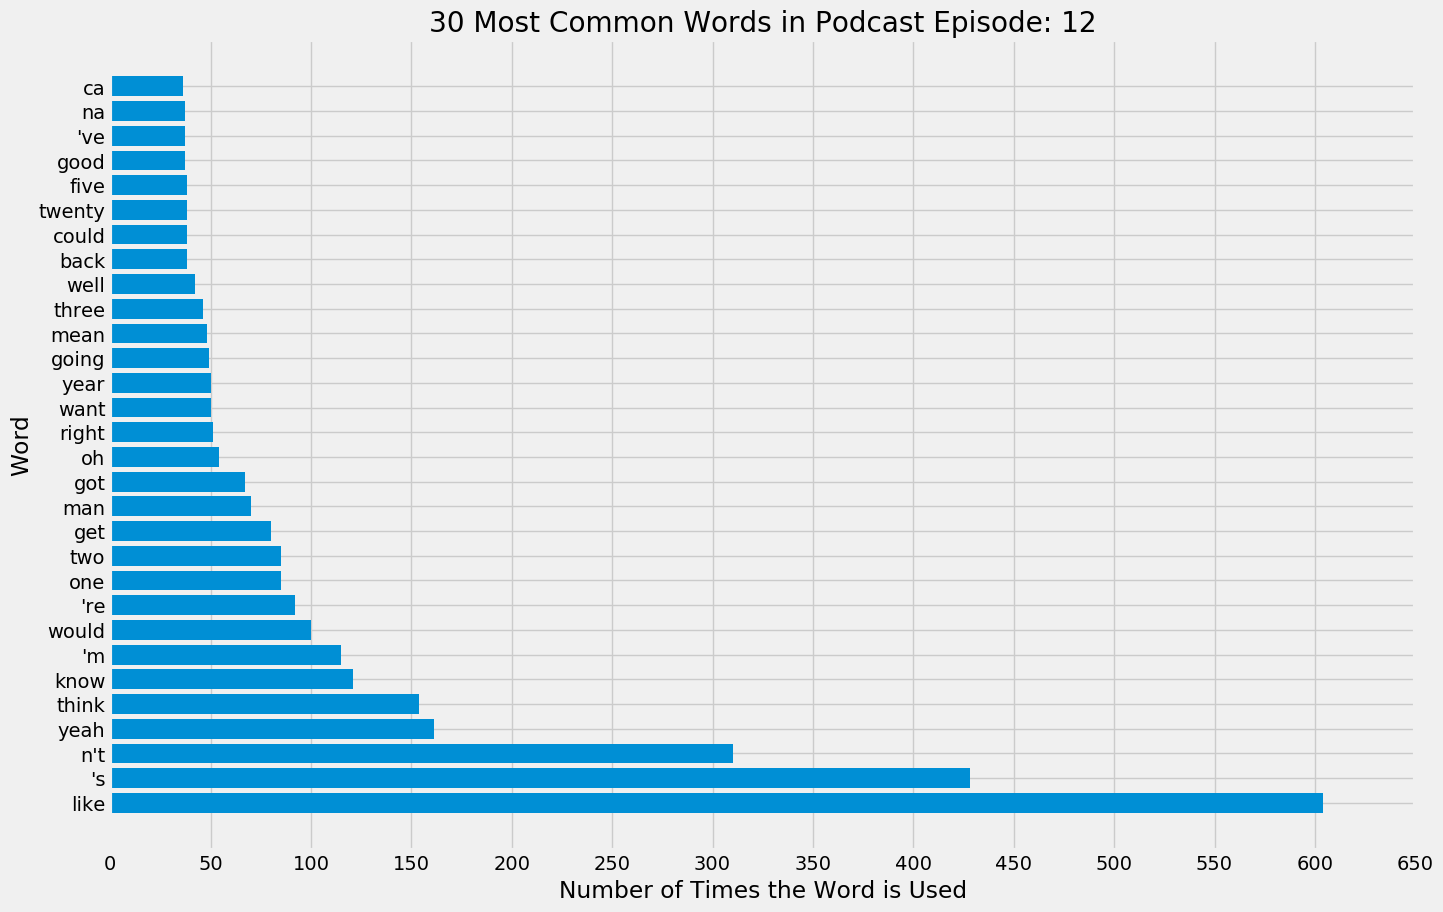

In [333]:
fig = plt.figure(figsize=(15, 10))
plt.barh(list(mc.keys()),list(mc.values()))
plt.xticks(range(0,max(mc.values())+50,50))
plt.title("30 Most Common Words in Podcast Episode: " + str(podcast_episode))
plt.ylabel("Word")
plt.xlabel("Number of Times the Word is Used")
plt.show()

In [334]:
df_speech = df_speech[df_speech["file_names"] == "12.json"]

In [335]:
df_speech

,media_info.container.kind,media_info.container.duration,media_info.container.bitrate,media_info.container.size,media_info.audio.codec,media_info.audio.channels,media_info.audio.sample_rate,media_info.audio.duration,media_info.audio.bitrate,processed_region.start,processed_region.end,processed_region.audio.speech.num_talkers,processed_region.audio.speech.percentage,processed_region.audio.speech.details,file_names
0,none,6363.211,128000,101811384,mp3,2,44100,6363.219,128000,0.0,6363.22,11,94.8,"[{'talker_id': 1, 'talk_listen_ratio': 0.07, '...",12.json


In [336]:
# We can convert these timestamped segments to speaker vectors for visualization

empty = np.zeros((max(df_speech["processed_region.audio.speech.num_talkers"]),int(max(df_speech["media_info.container.duration"]))))
df_speech = df_speech.sample(frac=1) #Shuffle 

monologues = []

for index, row in df_speech.iterrows():
    prasd = row["processed_region.audio.speech.details"]
    monologue_indiv = []
    for talker in prasd:
        for sect in talker["sections"]:
            if sect["duration"] == talker["longest_monologue"]:
                monologue_indiv.append([talker["longest_monologue"],sect["start"],sect["duration"]])
                
            c = 0
            while c < sect["duration"]:
                empty[talker["talker_id"]-1][int(sect["start"]) + c] = empty[talker["talker_id"]-1][int(sect["start"]) + c] + 1
                c = c + 1
                
    monologues.append(monologue_indiv)

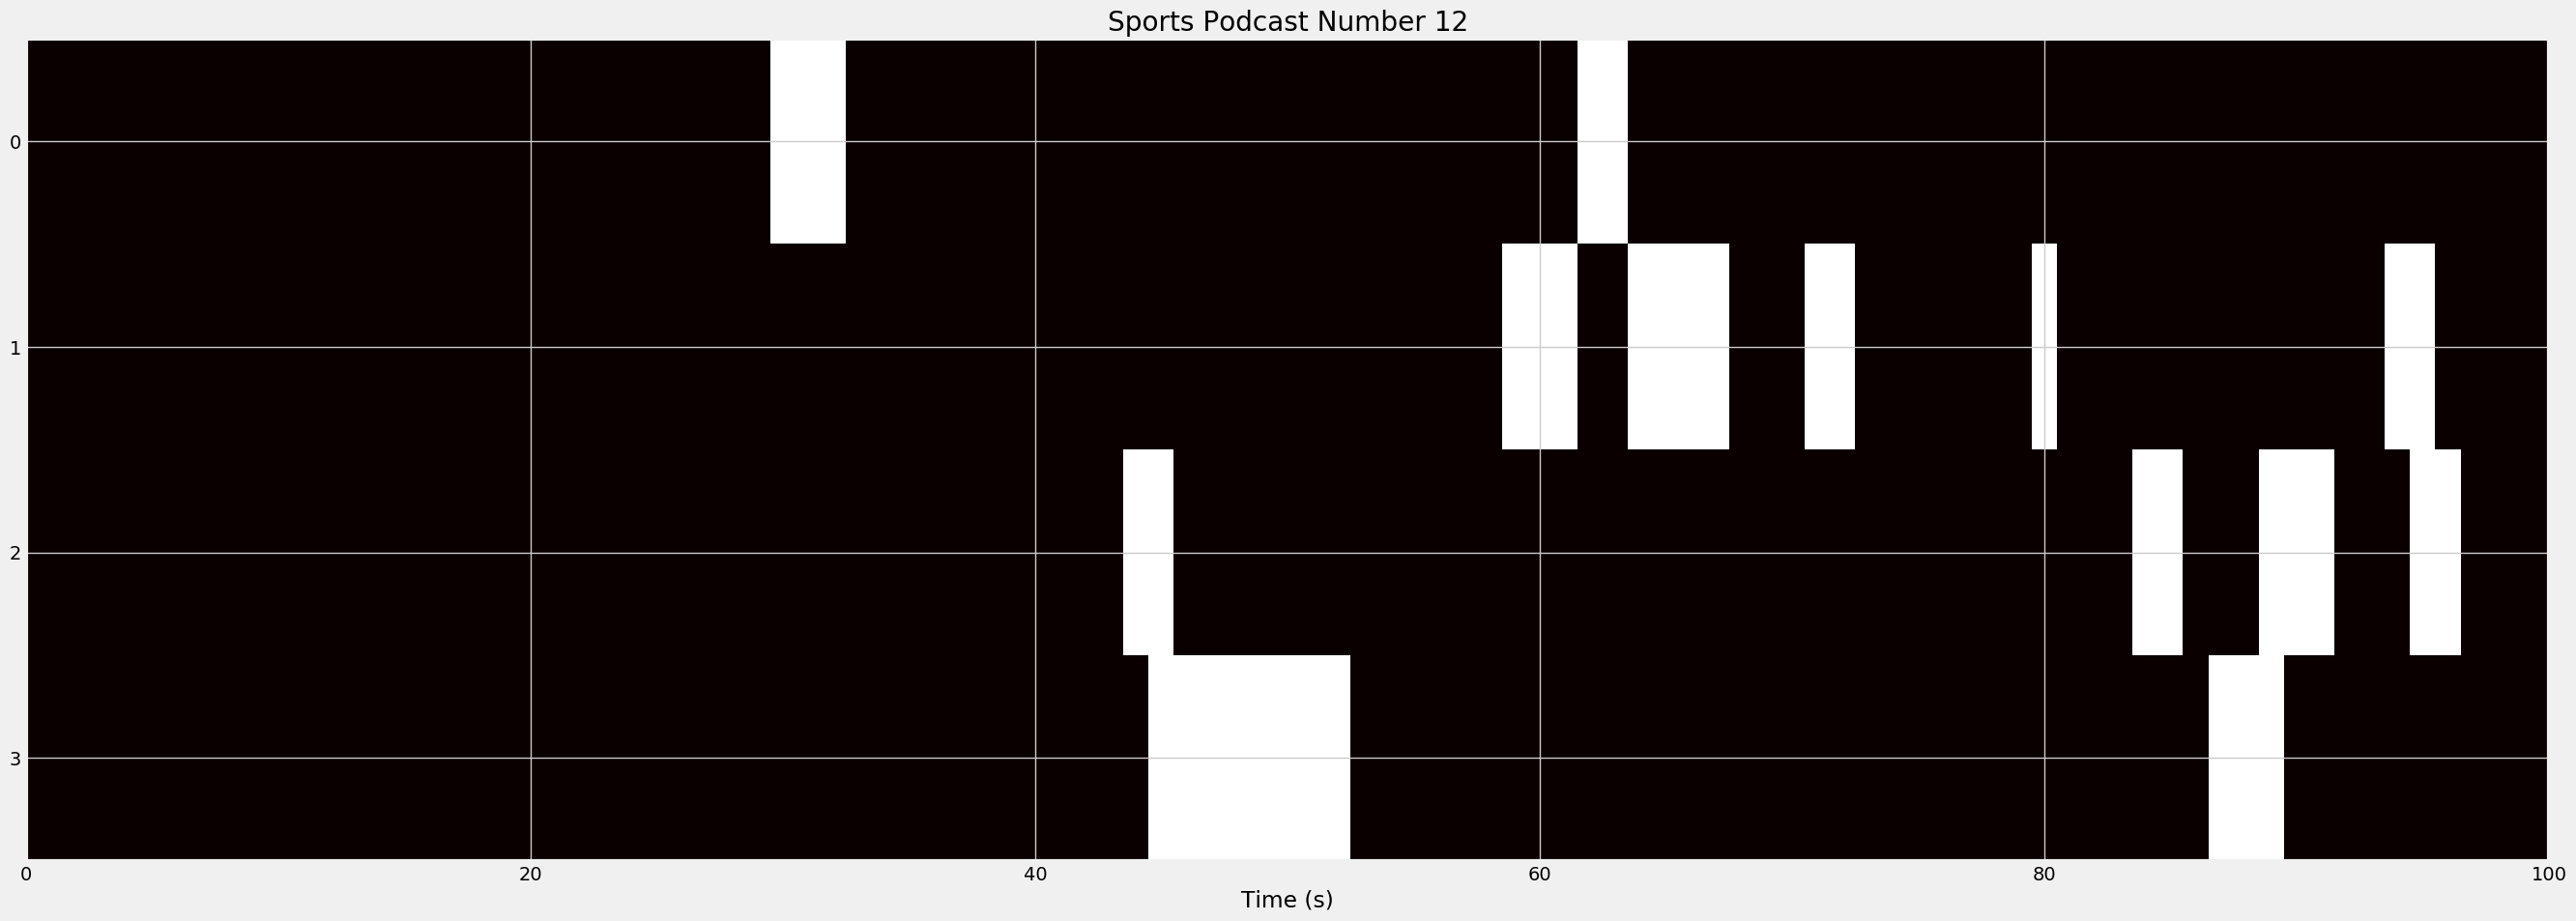

In [339]:
speaker_scope = 4
duration = 100

lest = np.arange(0, speaker_scope)

fig, gnt = plt.subplots()
fig.set_size_inches(30, 10.5)

plt.imshow(empty[:speaker_scope], cmap='hot', interpolation='nearest', aspect = "auto")
gnt.set_xlim(0,duration)
plt.yticks(lest,lest)
plt.title("Sports Podcast Number 12")
plt.xlabel("Time (s)")
#plt.colorbar()
#plt.savefig("Spoken Podcasts")
plt.show()

In [340]:
#load in trascriptions
transcriptions = {}
for file in os.listdir("raw_transcriptions/"):
    name = int(file.split(".")[0])
    load_file = json.load(open("raw_transcriptions/" + file))
    transcriptions[name] = load_file["combinedRecognizedPhrases"][0]["display"]

In [248]:
ep = 12
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(transcriptions[ep])))

In [341]:
#Spacy an alternative
orgs = []
for i in ne_tree:
    if isinstance(i, nltk.tree.Tree) and i.label() == 'ORGANIZATION':
        orgs.append(i[0][0])
set(orgs)

{'ABA',
 'ACL',
 'Accident',
 'All',
 'Ant',
 'Blake',
 'Brad',
 'Bucks',
 'Bucs',
 'CCJ',
 'CJ',
 'CP3',
 'Celtics',
 'Clippers',
 'DeAngelo',
 'Doc',
 'Dort',
 'ESP',
 'GEICO',
 'GM',
 'GT',
 'Gen',
 'Giannis',
 'Globetrotters',
 'Guys',
 'Jazz',
 'Jumbotron',
 'KD',
 'KKK',
 'Kate',
 'Kimball',
 'LA',
 'LSU',
 'Lakers',
 'LeBron',
 'Lenny',
 'Lonnie',
 'MCW',
 'MVP',
 'Max',
 'McHale',
 'McMahon',
 'McMillan',
 'Mcdata',
 'Minnesota',
 'Mitchell',
 'NBA',
 'NBC',
 'Nate',
 'Navy',
 'Nets',
 'Norm',
 'OH',
 'OK',
 'OKC',
 'PG',
 'PJ',
 'Parent',
 'Penguin',
 'Philly',
 'Pirates',
 'Raptors',
 'Reggie',
 'Rodman',
 'Rosen',
 'Russell',
 'SIM',
 'SLC',
 'Sacramento',
 'Salt',
 'Shea',
 'Simmons',
 'Simpsons',
 'Spurs',
 'Suns',
 'Super',
 'Terrence',
 'Tyler',
 'UM',
 'Utah',
 'Warriors',
 'Wiggins',
 'Yankees',
 'Year',
 'Yeti'}

In [342]:
vals = {}
target_word = 'Bucks'
#https://www.nba.com/bucks/
#Not a Bucks fan...

vals = json.load(open("raw_transcriptions/"+ str(ep) +".json"))["recognizedPhrases"]
for i, count in zip(vals,np.arange(0,len(vals))):
    if target_word in i['nBest'][0]['display']:
        sen_num = count
        print(i['nBest'][0]['display'])
        start = i['offsetInTicks'] //10000000
        end = (i['offsetInTicks'] + i['durationInTicks']) //10000000
        break

Who should the Bucks should win though, right?


In [343]:
start/60

57.05

In [344]:
end/60

57.083333333333336

In [345]:
running_list = ""
for offset in np.arange(1,8):
    running_list = running_list + vals[sen_num - 3 + offset]["nBest"][0]["display"] + ". "
sid.polarity_scores(running_list)

{'neg': 0.047, 'neu': 0.653, 'pos': 0.3, 'compound': 0.9893}

In [346]:
running_list

"I just want the same energy if the Suns lose, why OK? So the heat going on Chris Paul? He's the guy, right?. So question.. Who should the Bucks should win though, right?. Of the teams left I feel like the Bucs have the best case of like we should. You can talk yourself and I think they have the best player left.. Jeffco were healthy. It would be different but yeah so yeah they said ACL injury was like those don't end too well. It's never lies his day today it was it looked reported it like that though.. We'll check back next week. What are you talking about day today? He might play for game four was like for ACL Aw.. So I feel like they're the best team left.. "

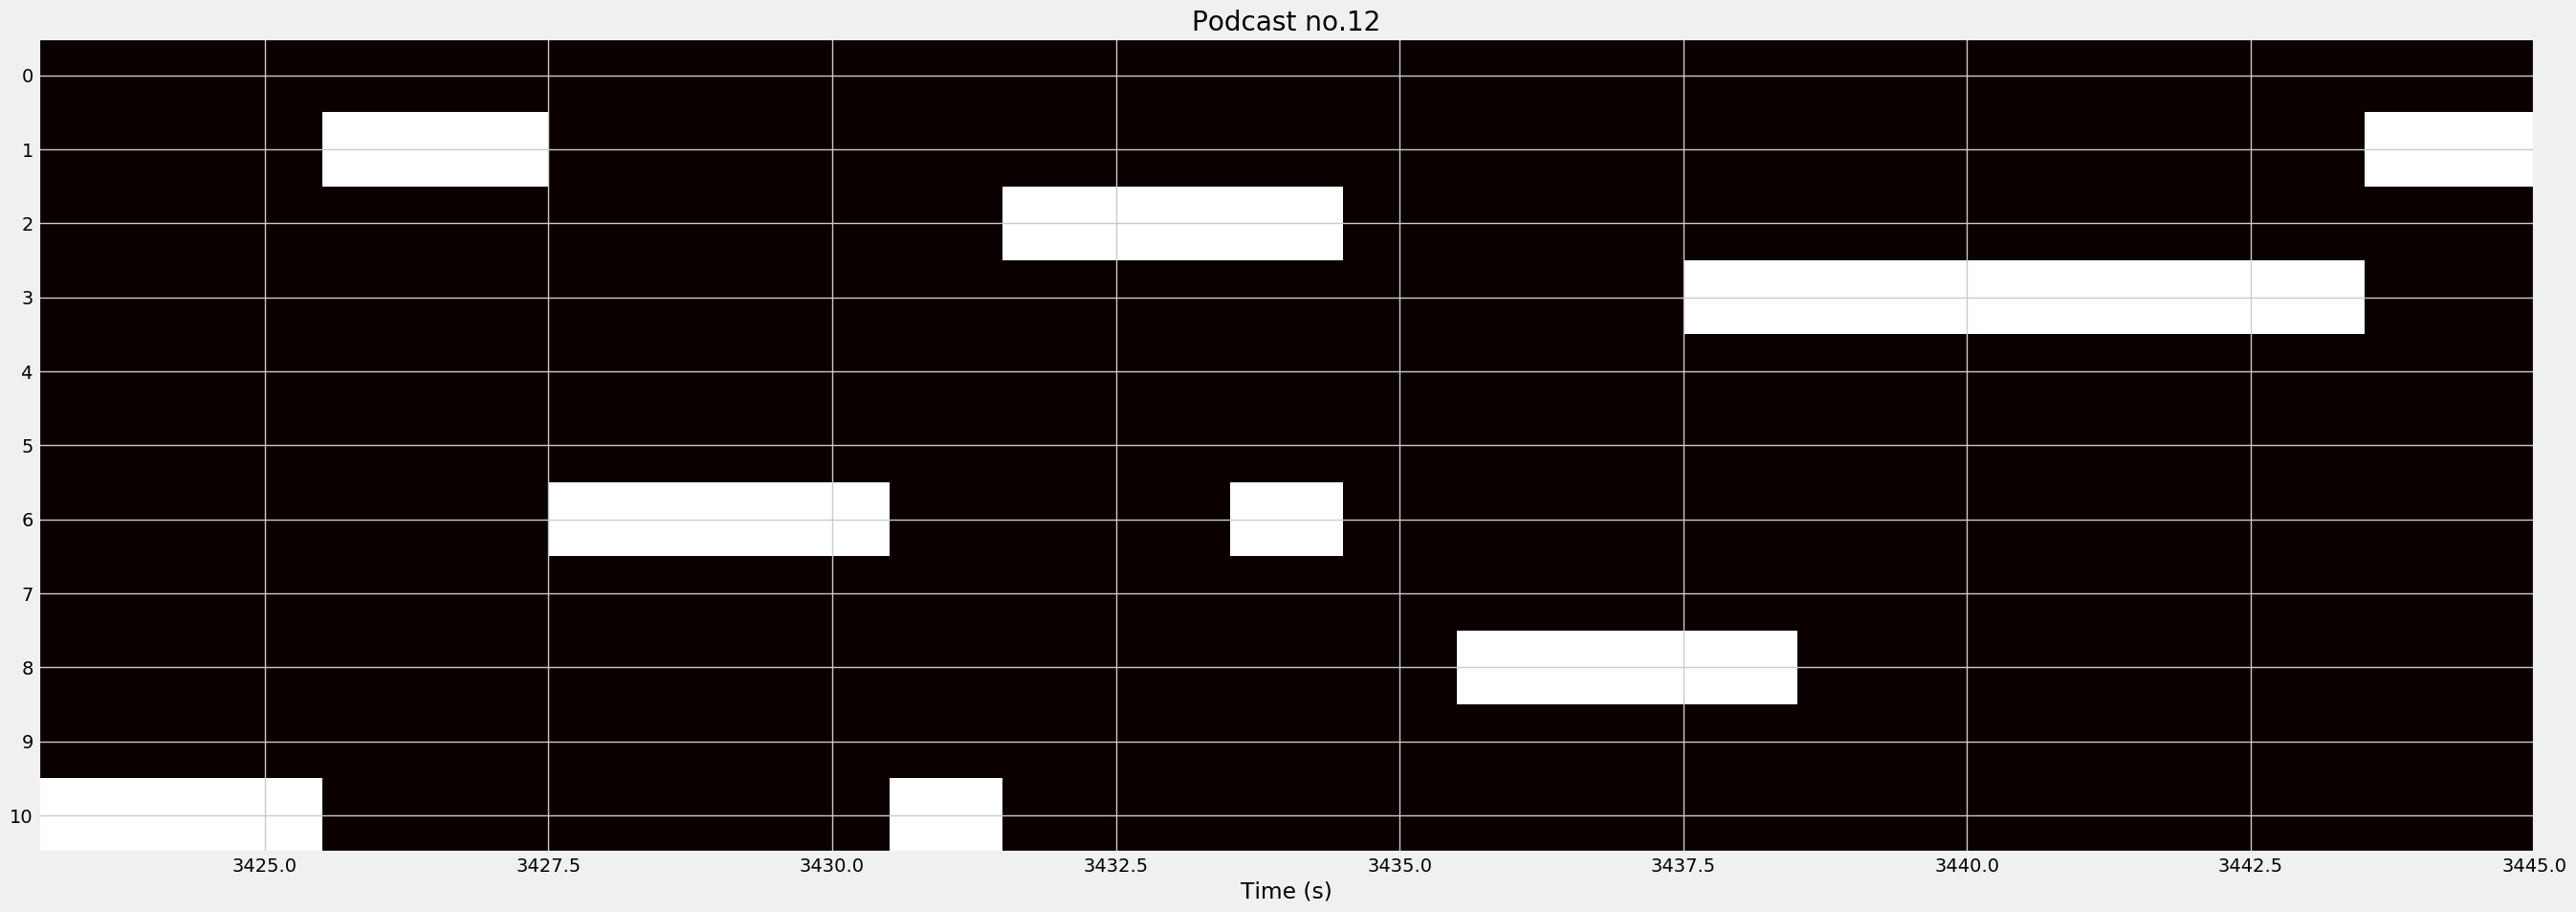

In [347]:
lest = np.arange(empty[:15].shape[0])

fig, gnt = plt.subplots()
fig.set_size_inches(30, 10.5)
plt.imshow(empty[:15]/20, cmap='hot', interpolation='nearest', aspect = "auto")
gnt.set_xlim(int(start),int(end) +20)
plt.yticks(lest,lest)
plt.title("Podcast no.12")
plt.xlabel("Time (s)")

plt.show()

In [348]:
window = empty.T[int(start):int(start)+120]
window

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [349]:
np.sum(window, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 2., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
       1., 2., 0., 1., 1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 1., 1., 1.,
       1.])

In [350]:
np.where(np.sum(window, axis=1) == 0)

(array([ 12,  39,  47,  48,  55,  83,  92, 104, 107, 111], dtype=int64),)

## Like this project and have some ideas of your own?
---

You can submit your ideas here:https://go.dolby.io/pydata-2021

The Dolby.io team will be picking their **5 favorite Analyze API ideas live during the workshop** and an **additional 5 favorite Analyze API ideas after November 7th** so add some of your favorite ideas for how you can use our API and win some free API minutes.